# Import libraries

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')

# Import Training Data

In [2]:
# Import training data 
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


# Analysis and Splitting of data

In [4]:

plt.hist(train['glasses'])
plt.show()
             

<Figure size 640x480 with 1 Axes>

In [5]:
X = train.iloc[:,1:513].values
y = train.iloc[:,513].values

In [6]:

x_train , x_test ,y_train ,  y_test = train_test_split( X,y, test_size=0.2, random_state=0) 

# Training Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(x_train, y_train)

# Accuracy , cv score and Confusion matrix

In [26]:
#Accuracy using regression
print('Accuracy of logistic regression model : ',lr.score(x_test,y_test)*100,'%')


Accuracy of logistic regression model :  98.88888888888889 %


In [9]:

print("Cross Validaion scores : ",cross_val_score(lr, x_test, y_test, cv=3))

Cross Validaion scores :  [0.92026578 0.92       0.91973244]


In [10]:


print('Confusion Matrix ','\n',confusion_matrix( y_test,lr.predict(x_test)))

Confusion Matrix  
 [[298  10]
 [  0 592]]


# AUC ROC CURVE OF LR MODEL




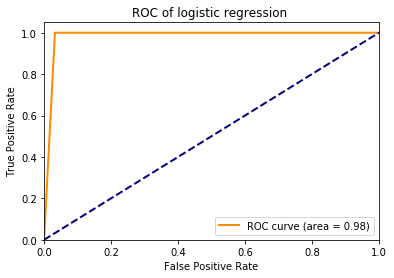

In [27]:
fpr,tpr,_= roc_curve(y_test,lr.predict(x_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of logistic regression ')
plt.legend(loc="lower right")
plt.show()

# DIMENSION REDUCTION USING PCA 

In [11]:


from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(x_train)



PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca_x_train = pca.transform(x_train)
pca_x_test  = pca.transform(x_test)

# Accuracy , cv score and Confusion matrix

In [13]:
pca_lr = LogisticRegression(random_state=0).fit(pca_x_train, y_train)

In [14]:
print('Accuracy of Linear regression model After PCA : ',pca_lr.score(pca_x_test,y_test)*100,'%')

Accuracy of Linear regression model After PCA :  99.66666666666667 %


In [15]:
print("Cross Validaion scores after PCA : ",cross_val_score(pca_lr, pca_x_test, y_test, cv=3))

Cross Validaion scores after PCA :  [0.97009967 0.96333333 0.97993311]


In [16]:
print('Confusion Matrix ','\n',confusion_matrix( y_test,pca_lr.predict(pca_x_test)))

Confusion Matrix  
 [[306   2]
 [  1 591]]


# AUC ROC of PCA applied model

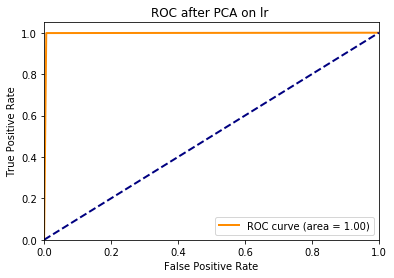

In [28]:
fpr,tpr,_= roc_curve(y_test,pca_lr.predict(pca_x_test))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC after PCA on lr ')
plt.legend(loc="lower right")
plt.show()
